In [1]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def save_fig(filename, fig=None):
    if fig is None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    else:
        fig.savefig(filename, dpi=300, bbox_inches='tight')

## Get residual vectors

In [3]:
T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]

In [4]:
def plot_expected_fit(row,c='k'):
    function = lambda dH, Tm, x: 1 / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))

    vals = np.array(row[conds].values,dtype=float) 
    errors = np.array(row[errs].values,dtype=float)

    T_celsius=[15,17.5,20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH'],row['Tm'], T_inv)
    
    xlim([13,62])
    ylim([-0.1,1.4])

    errorbar(T_celsius, vals,yerr=errors,fmt='.',c=c)
    plot(T_celsius, pred_fit, c=c)
    
    
# Create custom palette
palette=['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
# sns.palplot(palette)

In [5]:
def get_expected_fit(row):
    function = lambda dH, Tm, x: 1 / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))
#     conds = [x for x in lib2.keys() if x.endswith('_redNorm_median')]
#     vals = np.array(row[conds].values,dtype=float) 
#     errors = np.array(row[errs].values,dtype=float)

    T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH_final'],row['Tm_final'], T_inv)
    
    return pred_fit

In [6]:
lib2 = pd.read_csv(r'/Users/yuxi/workspace/nnn/data/fitted_variant/NNNlib2b_DNA_20211022_v5.CPvariant.gz', sep='\t')
lib2 = lib2.query('RMSE_final < 1')
conds = [x for x in lib2.keys() if x.endswith('_norm')]
errs = [x for x in lib2.keys() if x.endswith('_norm_std')]

In [7]:
def get_residuals(row, conds):
    residuals = row[conds].values - get_expected_fit(row)
    return residuals

residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
lib2[residual_conds] = lib2.apply(lambda row: get_residuals(row, conds), axis=1,result_type='expand')

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_10222/2697185485.py:2: RuntimeWarning: overflow encountered in exp
  function = lambda dH, Tm, x: 1 / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))


In [8]:
lib2.head()

,SEQID,Green14_20_norm,Green14_20_norm_std,Green15_22.5_norm,Green15_22.5_norm_std,Green16_25_norm,Green16_25_norm_std,Green17_27.5_norm,Green17_27.5_norm_std,Green18_30_norm,...,residual_37.5C,residual_40C,residual_42.5C,residual_45C,residual_47.5C,residual_50C,residual_52.5C,residual_55C,residual_57.5C,residual_60C
0,BC0,-0.138808,0.126940,-0.130819,0.144318,-0.108997,0.217057,-0.132276,0.163500,-0.153835,...,-0.130883,-0.093977,-0.083330,-0.095842,-0.066308,-0.023468,-0.074457,-0.051153,-0.030073,-0.063561
1,BC1,-0.088177,0.153139,-0.026094,0.181530,-0.054233,0.214253,-0.036633,0.186208,-0.061795,...,-0.153174,-0.205559,-0.221054,-0.324761,-0.283168,-0.332635,-0.348724,-0.388529,-0.333356,-0.459468
2,BC2,-0.011455,0.232782,0.000825,0.180591,0.021877,0.364618,0.064680,0.230905,0.083584,...,-0.196020,-0.162161,-0.188219,-0.170979,-0.223307,-0.228098,-0.326293,-0.244858,-0.252220,-0.184023
3,BC3,-0.048672,0.252318,-0.030815,0.176781,-0.046238,0.347769,-0.040474,0.307029,-0.049103,...,-0.068251,-0.041945,-0.048144,-0.081840,-0.047047,-0.030059,-0.066285,-0.011295,-0.005543,0.022567
4,BC4,-0.037135,0.192135,-0.025559,0.180159,0.007286,0.258787,0.008959,0.215012,-0.039662,...,-0.119453,-0.083455,-0.105055,-0.113717,-0.099051,-0.093008,-0.151797,-0.105598,-0.166239,-0.153297


In [9]:
print('min residual:\n'), lib2[residual_conds].agg('min'), print('\nmax residual:\n'), lib2[residual_conds].agg('max')

min residual:


max residual:



(None,
 residual_20C     -0.392686
 residual_22.5C   -0.303580
 residual_25C     -0.277753
 residual_27.5C   -0.238603
 residual_30C     -0.286813
 residual_32.5C   -0.306291
 residual_35C     -0.366097
 residual_37.5C   -0.410862
 residual_40C     -0.424704
 residual_42.5C   -0.443538
 residual_45C     -0.537851
 residual_47.5C   -0.564767
 residual_50C     -0.622699
 residual_52.5C   -0.626497
 residual_55C     -0.682853
 residual_57.5C   -0.674965
 residual_60C     -0.851002
 dtype: float64,
 None,
 residual_20C      0.775824
 residual_22.5C    0.462428
 residual_25C      0.520772
 residual_27.5C    0.486968
 residual_30C      0.476135
 residual_32.5C    0.451261
 residual_35C      0.481270
 residual_37.5C    0.371229
 residual_40C      0.404850
 residual_42.5C    0.465375
 residual_45C      0.536336
 residual_47.5C    0.493294
 residual_50C      0.567275
 residual_52.5C    0.666421
 residual_55C      0.749935
 residual_57.5C    0.889520
 residual_60C      0.936789
 dtype: float64)

## UMAP visualization

In [10]:
import umap

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

In [11]:
%%time
np.random.seed(42)
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='euclidean').fit_transform(lib2[residual_conds])
lib2[['UMAP_1', 'UMAP_2']] = embedding

CPU times: user 39.6 s, sys: 2.08 s, total: 41.7 s
Wall time: 12.5 s


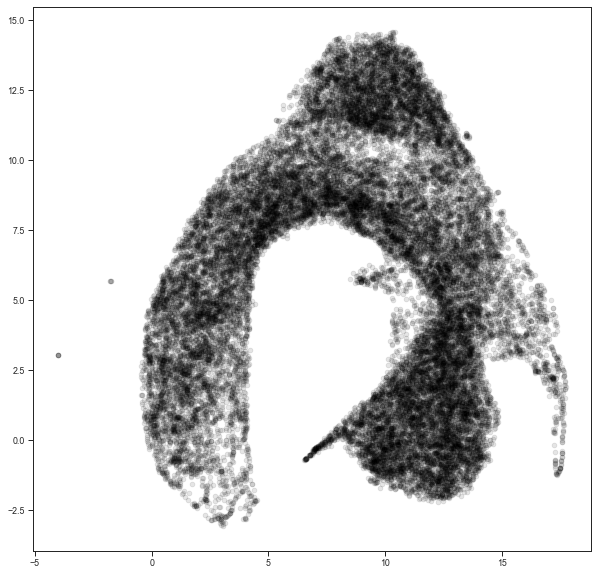

In [12]:
fig, ax = subplots(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color='k', alpha=0.1)

In [13]:
hover_data=['SEQID', 'dH_final','Tm_final', 'RMSE_final']

In [14]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='RMSE_final', 
                 hover_data=hover_data,
                 width=1200, height=1000)
fig.write_html("./fig/residual_UMAP_series.html")
fig.show()

In [15]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='Tm', size='RMSE',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1200, height=1000, range_color=[273,373],
                 title='UMAP of residuals across temperatures')

fig.write_html("../fig/residual_UMAP_RMSEsize_Tmcolor.html")
fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['SEQID', 'Green14_20_norm', 'Green14_20_norm_std', 'Green15_22.5_norm', 'Green15_22.5_norm_std', 'Green16_25_norm', 'Green16_25_norm_std', 'Green17_27.5_norm', 'Green17_27.5_norm_std', 'Green18_30_norm', 'Green18_30_norm_std', 'Green19_32.5_norm', 'Green19_32.5_norm_std', 'Green20_35_norm', 'Green20_35_norm_std', 'Green21_37.5_norm', 'Green21_37.5_norm_std', 'Green22_40_norm', 'Green22_40_norm_std', 'Green23_42.5_norm', 'Green23_42.5_norm_std', 'Green24_45_norm', 'Green24_45_norm_std', 'Green25_47.5_norm', 'Green25_47.5_norm_std', 'Green26_50_norm', 'Green26_50_norm_std', 'Green27_52.5_norm', 'Green27_52.5_norm_std', 'Green28_55_norm', 'Green28_55_norm_std', 'Green29_57.5_norm', 'Green29_57.5_norm_std', 'Green30_60_norm', 'Green30_60_norm_std', 'RMSE_final', 'Tm_final', 'Tm_lb_final', 'Tm_std_final', 'Tm_ub_final', 'chisquared_all_clusters', 'chisquared_of_median', 'dH_final', 'dH_lb_final', 'dH_std_final', 'dH_ub_final', 'enforce_fmax', 'enforce_fmin', 'fmax_final', 'fmax_lb_final', 'fmax_std_final', 'fmax_ub_final', 'fmin_final', 'fmin_lb_final', 'fmin_std_final', 'fmin_ub_final', 'n_clusters', 'rsqr_final', 'residual_20C', 'residual_22.5C', 'residual_25C', 'residual_27.5C', 'residual_30C', 'residual_32.5C', 'residual_35C', 'residual_37.5C', 'residual_40C', 'residual_42.5C', 'residual_45C', 'residual_47.5C', 'residual_50C', 'residual_52.5C', 'residual_55C', 'residual_57.5C', 'residual_60C', 'UMAP_1', 'UMAP_2'] but received: RMSE

In [125]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='Tm',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1200, height=1000, range_color=[273,373],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_Tm-color.html")
fig.show()

In [126]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='dG_37C',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dG_37C', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1200, height=1000, range_color=[-10, 10],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_dG_37C-color.html")
# fig.write_image("../fig/residual_UMAP_dG_37C-color.png")
fig.show()

In [149]:
fig = px.scatter(lib2[lib2['cluster'] == '1'], x='UMAP_1', y='UMAP_2', color='series',
                 hover_data=hover_data,
                 width=1200, height=1000, #range_color=[-10, 10],
                 title='UMAP of fitting residuals in cluster 1')

fig.write_html("../fig/residual_UMAP_cluster1_series.html")
# fig.write_image("../fig/residual_UMAP_dG_37C-color.png")
fig.show()

In [15]:
lib2[lib2['cluster'] == '1']

KeyError: 'cluster'

ValueError: Could not interpret input 'Series'

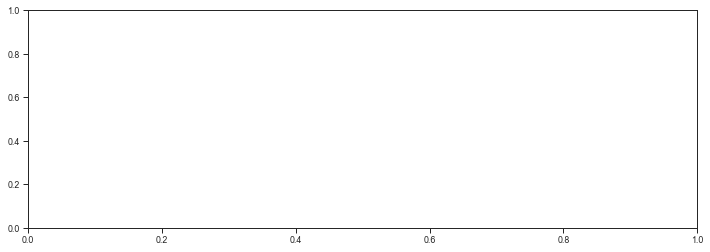

In [128]:
fig, ax = subplots(figsize=(12,4))
sns.countplot(data=lib2[lib2['cluster'] == '1'], x='Series')

plt.savefig("../fig/cluster1_series_countplot.png")


In [ ]:
fig, ax = subplots(figsize=(12,4))
sns.countplot(data=lib2[lib2['cluster'] == '5'], x='series')

plt.savefig("../fig/cluster5_series_countplot.png", dpi=800)


## Louvain clustering

In [16]:
from sklearn import cluster

from sklearn.neighbors import kneighbors_graph
from community import best_partition
import networkx as nx

In [17]:
%%time
A = kneighbors_graph(lib2[residual_conds].values, n_neighbors=5, p=1)
G = nx.from_scipy_sparse_matrix(A)

CPU times: user 16.9 s, sys: 3.47 s, total: 20.4 s
Wall time: 20.5 s


In [18]:
%%time
partition = best_partition(G, resolution=1)

CPU times: user 39.8 s, sys: 98.5 ms, total: 39.9 s
Wall time: 39.9 s


In [19]:
n_cluster = len(np.unique(list(partition.values())))
n_cluster

12

In [20]:
# if n_cluster <= 10:
#     cluster_lbl = [str(lbl) for lbl in list(partition.values())]
#     lbl_color_map = {str(i): palette[i] for i in range(n_cluster)}
# else:
# if there are more than 10 clusters, pad 0 to avoid confusions in the order
cluster_lbl = ['%02d' % lbl for lbl in list(partition.values())]
lbl_color_map = {'%02d' % i: palette[i] for i in range(n_cluster)}
lib2['cluster'] = cluster_lbl
# cluster_lbl

In [21]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='cluster', #size='RMSE',
                 hover_data=hover_data,
                 width=1000, height=1000, #range_color=[273,373],
                 color_discrete_map=lbl_color_map,
                 title='Louvain clusters of fitting residuals across temperatures')

fig.write_html("./fig/residual_UMAP_clusters_resolution2.html")
fig.show()

In [22]:
lbls = list(lib2.groupby('cluster').aggregate('mean')[residual_conds].index)

In [23]:
lib2.groupby('cluster').aggregate('mean')[residual_conds]

,residual_20C,residual_22.5C,residual_25C,residual_27.5C,residual_30C,residual_32.5C,residual_35C,residual_37.5C,residual_40C,residual_42.5C,residual_45C,residual_47.5C,residual_50C,residual_52.5C,residual_55C,residual_57.5C,residual_60C
cluster,,,,,,,,,,,,,,,,,
00,-0.083528,-0.057379,-0.061103,-0.071617,-0.102526,-0.050840,-0.072562,-0.087220,-0.071673,-0.082580,-0.084129,-0.058580,-0.034409,-0.061143,-0.031235,-0.006513,-0.029470
01,-0.078880,-0.064785,-0.076995,-0.103070,-0.151873,-0.131310,-0.180766,-0.211486,-0.224838,-0.233203,-0.277484,-0.282554,-0.295923,-0.337157,-0.347439,-0.362541,-0.413540
02,-0.056452,-0.036794,-0.042585,-0.060330,-0.099591,-0.066766,-0.104218,-0.126587,-0.121264,-0.105798,-0.129092,-0.108091,-0.105245,-0.134791,-0.143345,-0.146018,-0.175205
03,-0.075333,-0.045767,-0.020975,0.011955,0.030832,0.063130,0.066041,0.052146,0.068029,0.107638,0.050806,0.053762,0.041448,0.025231,0.010140,0.009699,0.007247
04,-0.045800,-0.037060,-0.046724,-0.070256,-0.108169,-0.081270,-0.106276,-0.107601,-0.084861,-0.042714,-0.076279,-0.060932,-0.062736,-0.081219,-0.093488,-0.088931,-0.098696
05,-0.038007,-0.026268,-0.029178,-0.041360,-0.067875,-0.035615,-0.057430,-0.055216,-0.033976,0.003128,-0.020688,0.005384,0.014590,-0.001533,0.004136,0.016622,0.014975
06,-0.010468,0.005897,0.012936,0.016155,0.010888,0.027293,0.015152,0.012746,0.033386,0.086416,0.042894,0.060875,0.061292,0.047683,0.050460,0.073936,0.090441
07,0.108249,0.116126,0.094626,0.041217,-0.042924,-0.074049,-0.160521,-0.168874,-0.166603,-0.109064,-0.092927,-0.008952,0.046589,0.040970,0.089357,0.104377,0.097347
08,0.003965,0.049085,0.065561,0.099475,0.117449,0.118367,0.115405,0.072411,0.086051,0.124526,0.065396,0.071554,0.063561,0.056366,0.041860,0.048492,0.054516


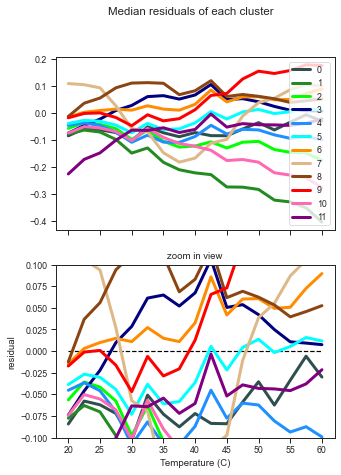

In [24]:
fi, ax = plt.subplots(2, 1, sharex=True, figsize=(5,7))
plt.suptitle('Median residuals of each cluster')
ax[1].plot([T_celsius[0], T_celsius[-1]], [0, 0], 'k--')
for i in range(n_cluster):
    c = '%02d'%i
    ax[0].plot(T_celsius, lib2.groupby('cluster').aggregate('median').loc[c, residual_conds].values, color=lbl_color_map[c], lw=3)
    ax[1].plot(T_celsius, lib2.groupby('cluster').aggregate('median').loc[c, residual_conds].values, color=lbl_color_map[c], lw=3)
plt.ylim([-0.1, 0.1])
ax[0].legend([str(i) for i in range(n_cluster)], loc='right')
ax[1].set_title('zoom in view')
plt.xlabel('Temperature (C)')
plt.ylabel('residual')

save_fig('./fig/median_residuals_of_each_cluster.png')

In [25]:
agg_col = ['dH_final', 'Tm_final', 'RMSE_final', 'fmax_final', 'Green30_60_norm', 'fmin_final', 'Green14_20_norm']
cluster_median = lib2.groupby('cluster').aggregate('median')[agg_col]
cluster_median

,dH_final,Tm_final,RMSE_final,fmax_final,Green30_60_norm,fmin_final,Green14_20_norm
cluster,,,,,,,
00,-30.858285,335.533114,0.118944,1.090303,0.397135,-0.081279,-0.080882
01,-31.855400,313.098475,0.128142,0.632206,0.549764,-0.081353,-0.034942
02,-37.456528,315.984662,0.144495,0.848050,0.763269,-0.081184,-0.039241
03,-14.994282,300.342948,0.220566,1.091364,0.923274,-0.081209,0.265899
04,-31.278127,310.149342,0.153988,0.924295,0.855852,-0.081335,0.017549
05,-22.444782,313.025450,0.155454,1.074186,0.873081,-0.081239,0.067360
06,-13.070989,298.906014,0.162461,1.093329,0.987599,-0.081288,0.379418
07,-9.413501,323.884978,0.479779,1.086813,0.718960,-0.080770,0.311919
08,-9.251129,285.980114,0.235126,1.094481,0.953720,-0.081137,0.590224


In [26]:
lib2['Tm_Celsius'] = lib2['Tm_final'] - 273.15

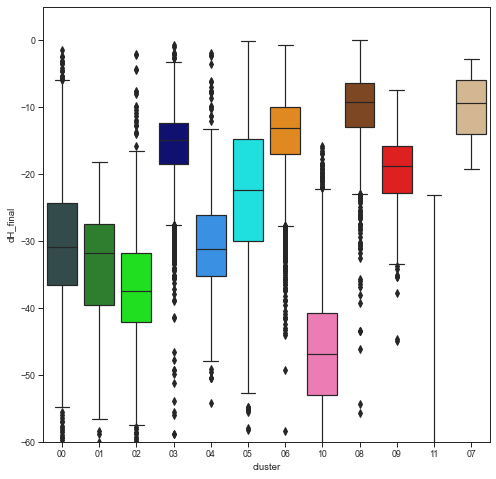

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=lib2, x='cluster', y='dH_final', palette=lbl_color_map)
plt.ylim([-60, 5])
plt.show()

In [28]:
np.sum(lib2[lib2['cluster'] == '1']['n_clusters_signal'] == 1)

KeyError: 'n_clusters_signal'

/Users/yuxi/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='n_clusters_signal'>

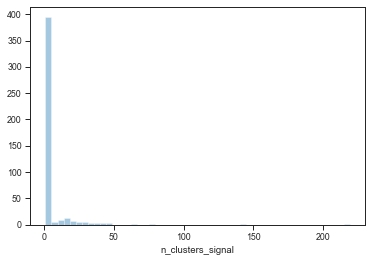

In [165]:
sns.distplot(lib2[lib2['cluster'] == '1']['n_clusters_signal'], kde=False, rug=False)

ValueError: Could not interpret input 'RMSE'

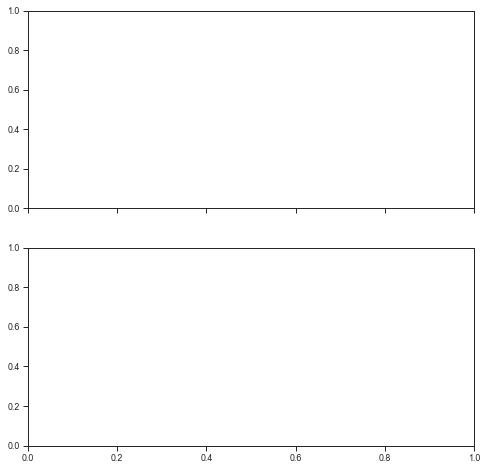

In [140]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map, ax=ax[0])
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map, ax=ax[1])
plt.ylim([0, 0.5])
plt.savefig('../fig/RMSE_per_cluster.png', dpi=600)

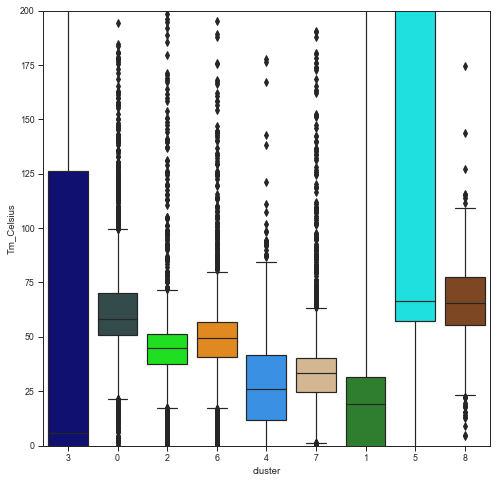

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax)
# sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax[1])
plt.ylim([0, 200])
plt.show()

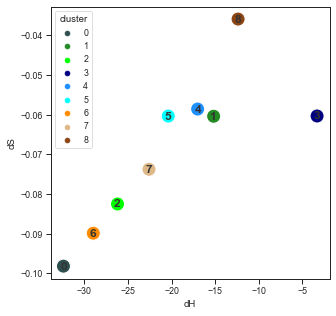

In [104]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cluster_median, x='dH', y='dS', hue='cluster', s=200, palette=lbl_color_map)
for i in range(n_cluster):
    plt.text(cluster_median.loc[str(i),'dH'], cluster_median.loc[str(i),'dS'], str(i), 
             size='large', weight='bold', color=(.2,.2,.2), ha='center', va='center')
plt.show()

In [29]:
from scipy.spatial.distance import cdist

In [30]:
def get_representative_variants(df, n_variant=10, method='median', metric='euclidean'):
    """
    Get the id of the variants nearest to the cluster center.
    Args:
        df - dataframe
        n_variant - int, #nearest variants to return
        method - str, 'median' or 'mean'
        metric - str
    Returns:
        variant_id - (n_cluster, n_variant) List[int]
    """
    varaint_id = []
    residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
    
    centroid = df.groupby('cluster').aggregate(method)[residual_conds]
    distances = cdist(centroid[residual_conds], df[residual_conds], metric=metric)
    is_in_cluster = np.zeros_like(distances, dtype=bool)
    for i in range(distances.shape[0]):
        is_in_cluster[i, :] = (df['cluster'] == '%02d'%i)
        
    distances[np.logical_not(is_in_cluster)] = np.inf
    variant_id = np.argsort(distances, axis=1)[:, :n_variant]
    
    return variant_id


def get_worst_variants(df, n_variant=10, by='RMSE_final'):
    """
    Get the id of the variants nearest to the cluster center.
    Args:
        df - dataframe
        n_variant - int, #worst variants to return
    Returns:
        variant_id - (n_cluster, n_variant) List[int]
    """
    n_cluster = len(np.unique(df['cluster']))
    varaint_id = np.zeros(n_cluster, n_variant)
    residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
    
    for i in range(n_cluster):
        sub_df = df.query('cluster == %02d' % i)
        variant_id[i,:] = 

    
    return variant_id

In [ ]:
lib2b

In [31]:
def plot_actual_and_expected_fit(row, ax, errorbar=True, c='k', ylim=None):
    function = lambda dH, Tm, fmax, fmin, x: (fmax - fmin) / (1 + np.exp(dH/0.00198*(Tm**-1 - x))) + fmin

    vals = np.array(row[conds].values,dtype=float) 
    errors = np.array(row[errs].values,dtype=float)

    T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH_final'],row['Tm_final'],row['fmax_final'],row['fmin_final'],T_inv)
    
    xlim([18,62])
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim([-0.1,1.4])

    if errorbar:
        ax.errorbar(T_celsius, vals,yerr=errors,fmt='.',c=c)
    else:
        ax.plot(T_celsius, vals, '.', c=c)
    ax.plot(T_celsius, pred_fit, c=c, lw=3)



(-0.1, 1.4)

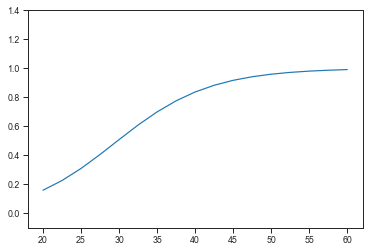

In [166]:
T_kelvin=[x+273.15 for x in T_celsius]
T_inv = np.array([1/x for x in T_kelvin])
function = lambda dH, Tm, fmax, fmin, x: (fmax - fmin) / (1 + np.exp(dH/0.00198*(Tm**-1 - x))) + fmin
y = function(dH=-30, Tm=303, fmax=1, fmin=0, x=T_inv)
plt.plot(T_celsius, y)
plt.ylim([-0.1, 1.4])

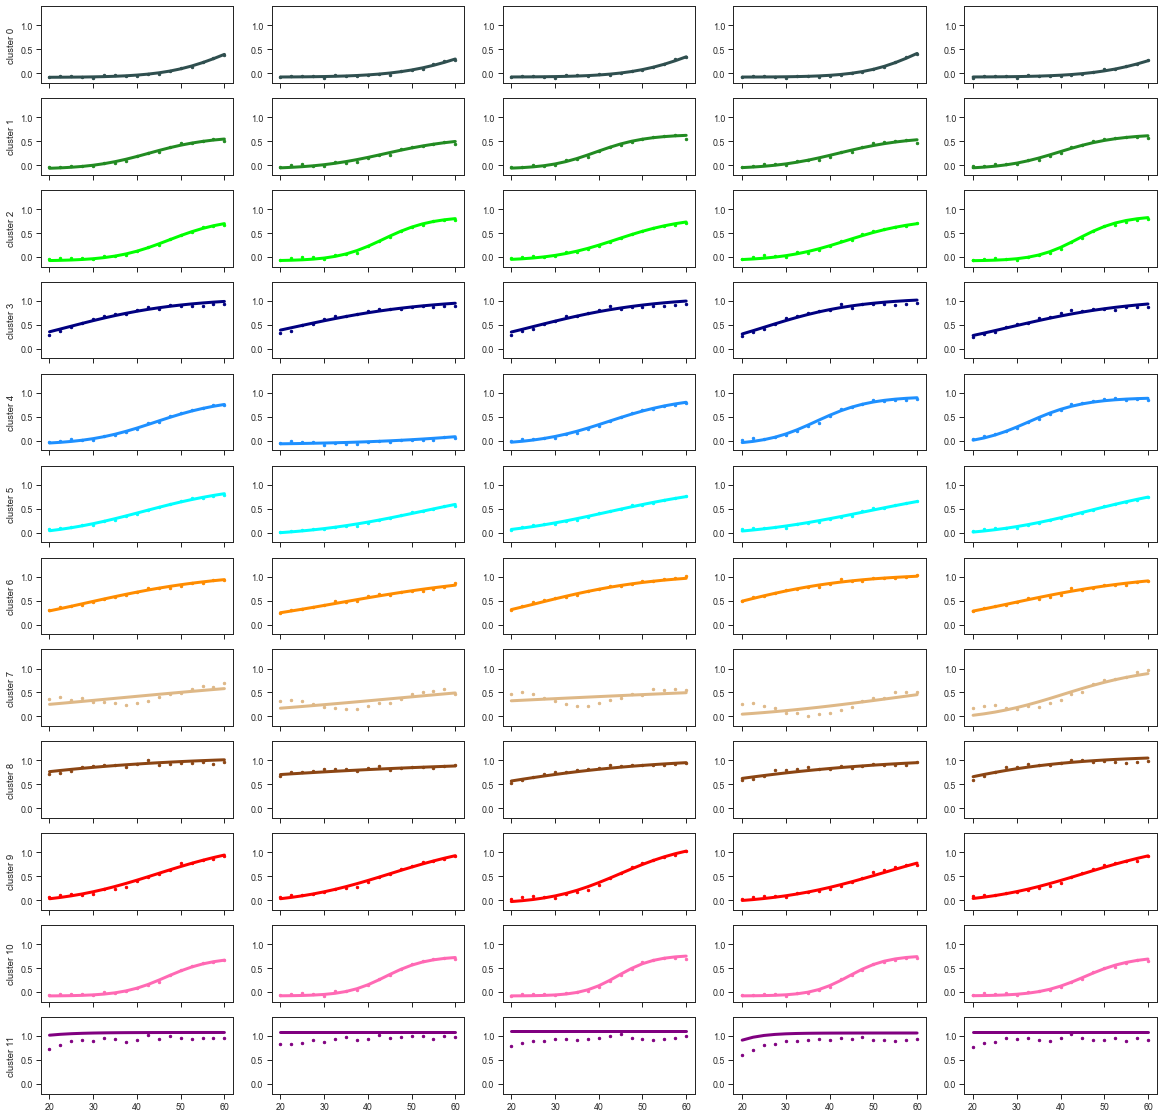

In [33]:
n_variant_plot = 5
variant_id = get_representative_variants(lib2.iloc[:,:])

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    ax[i,0].set_ylabel('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[variant_id[i,j], :], ax[i,j], c=lbl_color_map['%02d'%i], errorbar=False, ylim=[-.2, 1.4])

plt.savefig('./fig/representative_melting_curve_plots.png', bbox_inches='tight', dpi=300)
# fig.show()

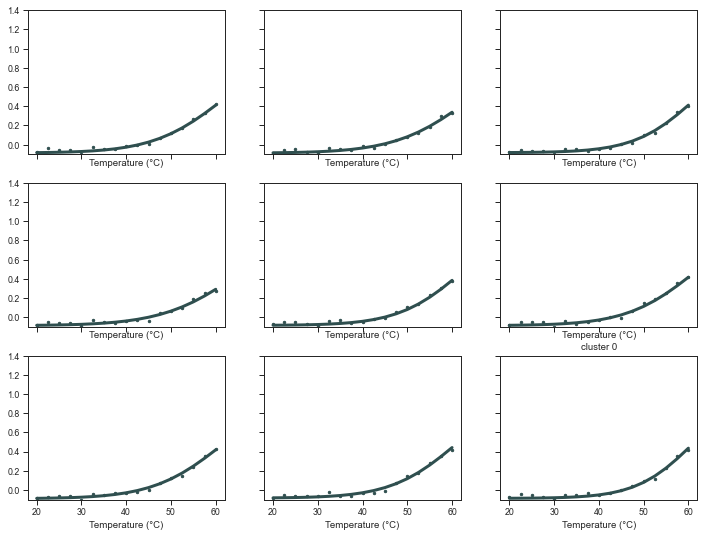

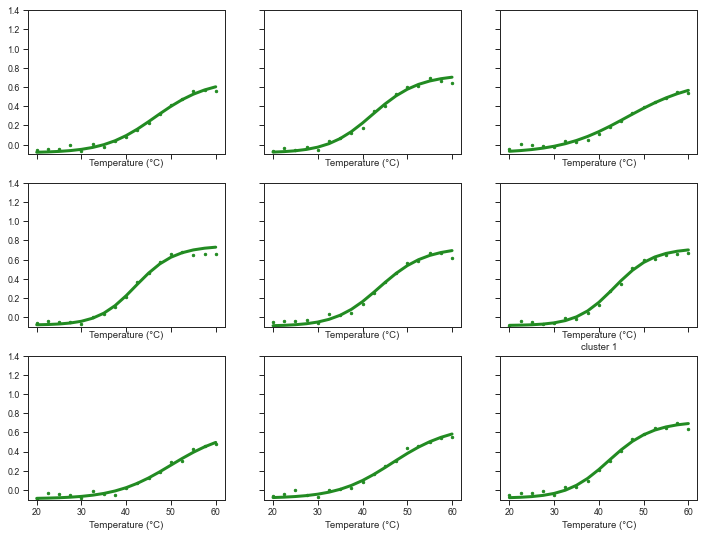

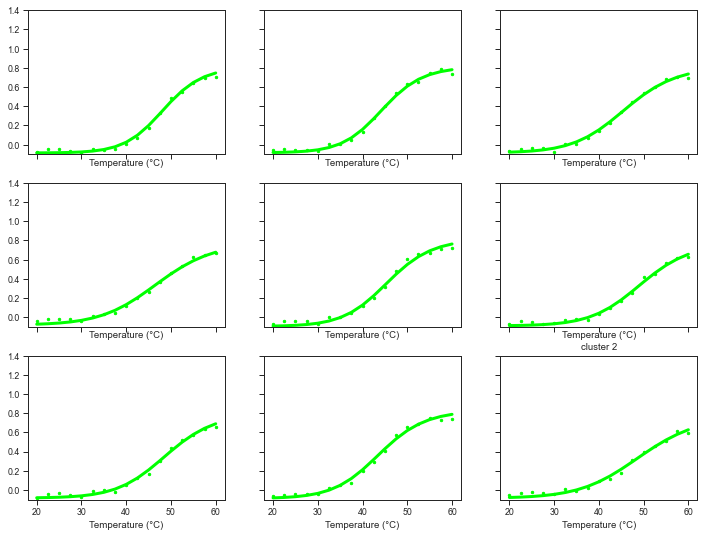

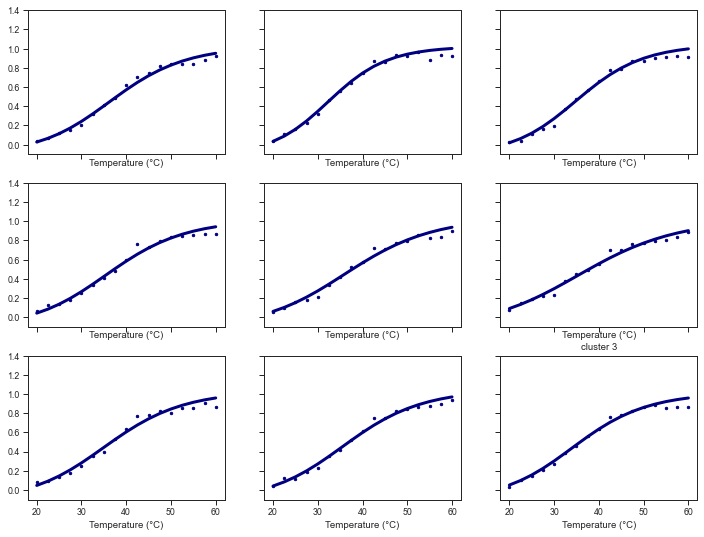

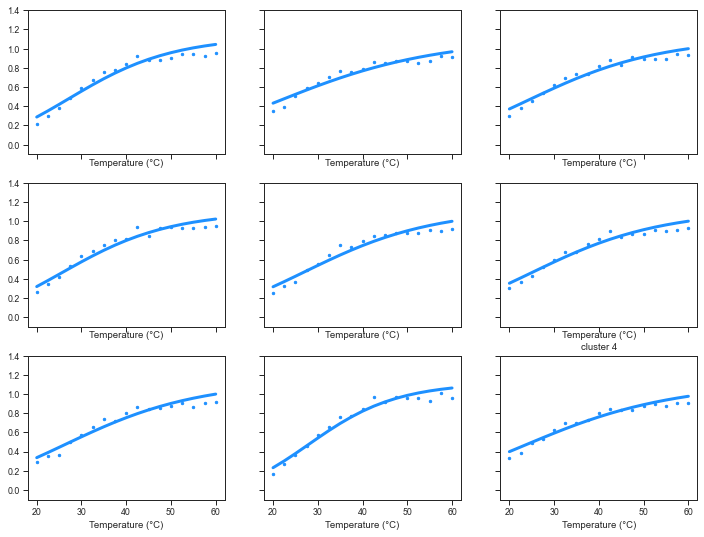

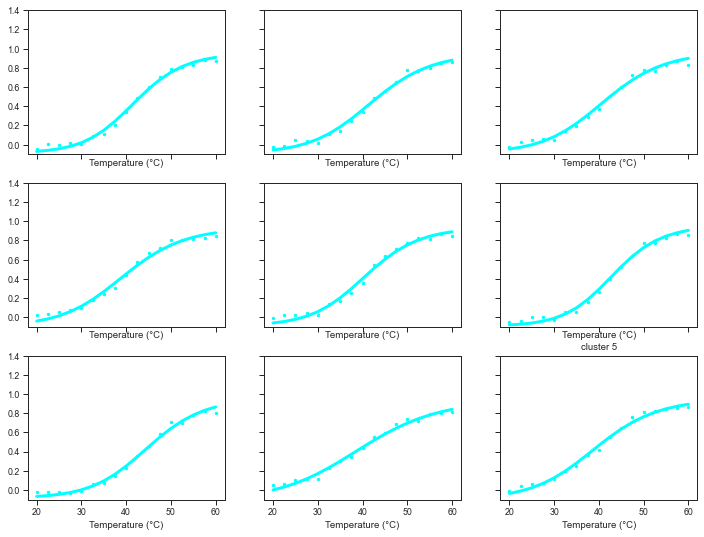

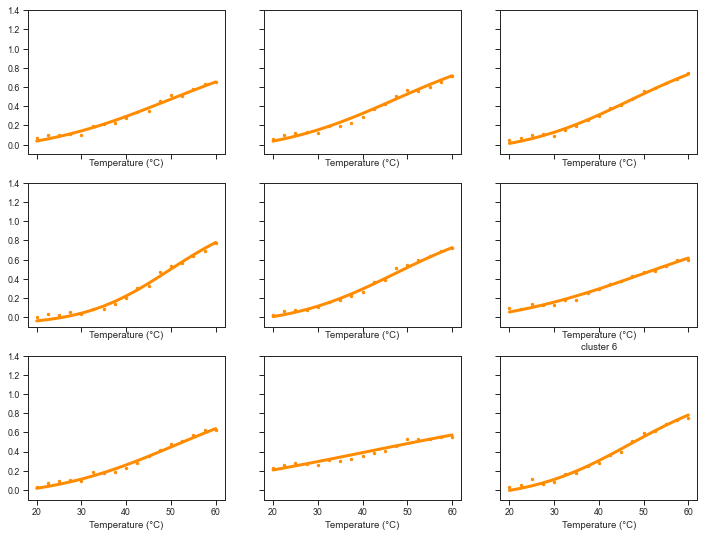

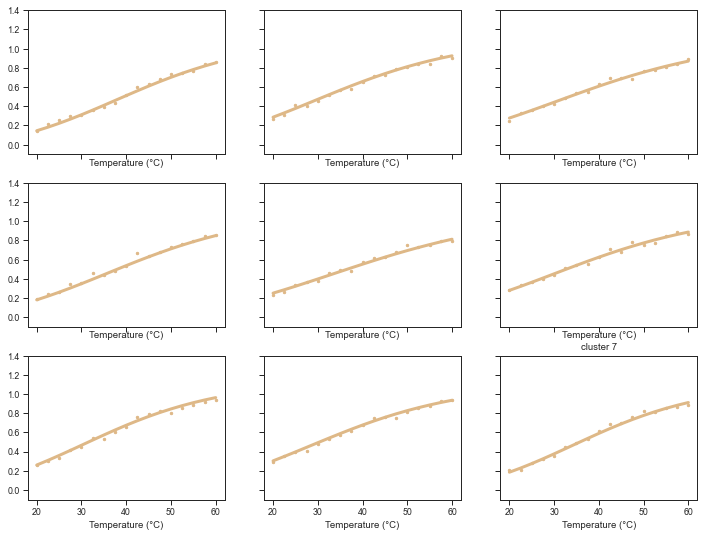

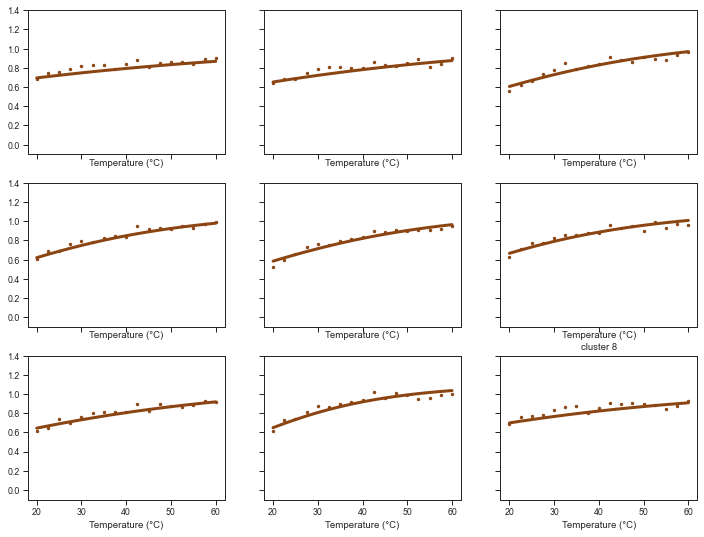

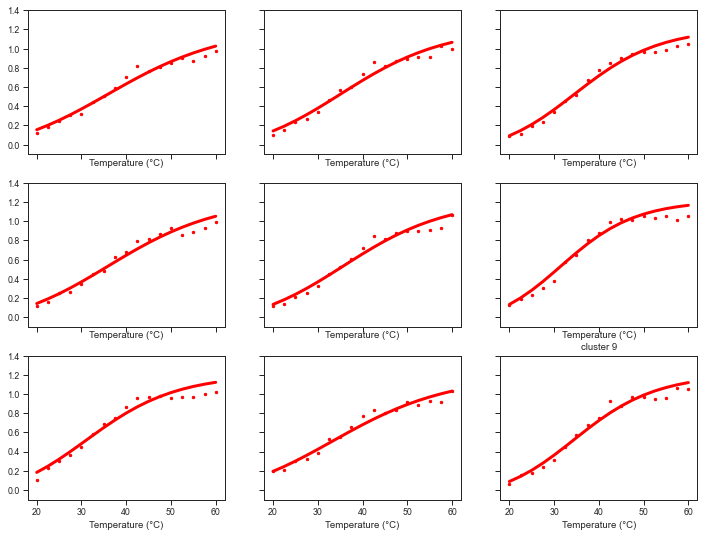

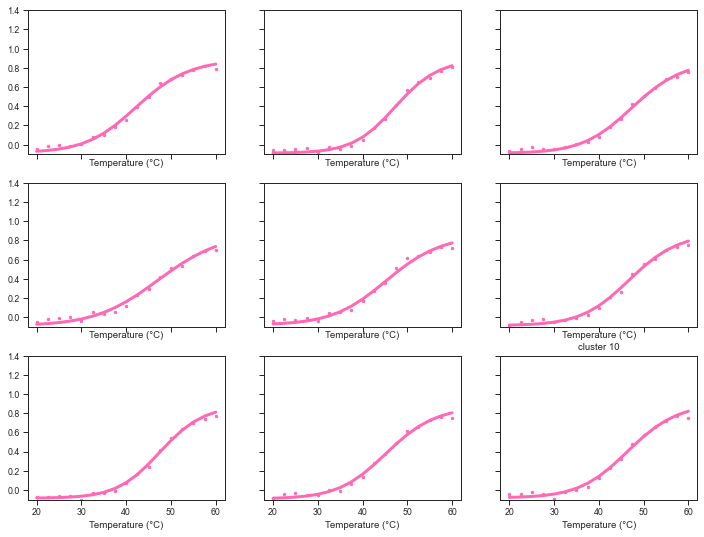

In [174]:
n_variant_plot = 9
variant_id = get_representative_variants(lib2.iloc[:,:])

for i in range(n_cluster):
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True , figsize=(12,9))
    ax = ax.flatten()
    plt.title('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[variant_id[i,j], :], ax[j], c=lbl_color_map['%02d'%i], errorbar=False)
        ax[j].set_xlabel('Temperature (°C)')
        save_fig('./fig/representative_melting_curve_plots_cluster%d.png' % i)

# fig.show()

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_88237/1901853017.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



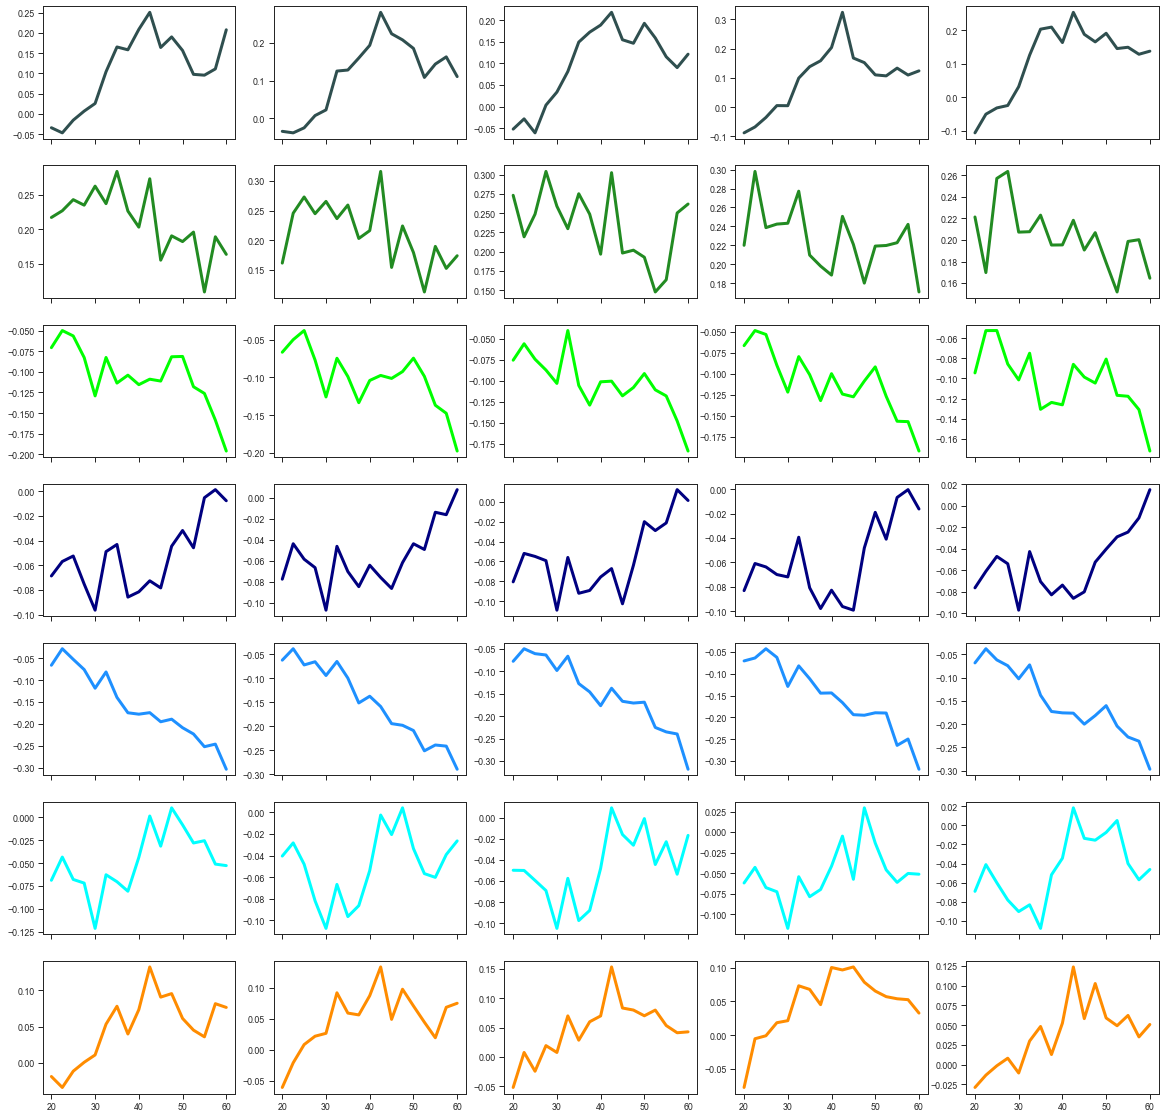

In [81]:
n_variant_plot = 5
variant_id = get_representative_variants(lib2.iloc[:,:])

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    for j in range(n_variant_plot):
        ax[i,j].plot(T_celsius, lib2.iloc[variant_id[i,j]][residual_conds], color=lbl_color_map[str(i)], lw=3)
#         ax[i,j].set_ylim
fig.show()